In [12]:
import seaborn as sns
import pandas as pd

running_backs = pd.read_csv("../../data/raw/running_backs.csv")

In [13]:
running_backs.head()

,Unnamed: 0,playerid,year,playername,team,age,g,gs,attempts,yards,tds,longgain,yardsperatt,yardspergame,fumbles
0,0,AAbduAm00,2020,Ameer Abdullah,MIN,27,6,0,2,7,0,4,3.5,1.2,0
1,1,AAbduAm00,2019,Ameer Abdullah,MIN,26,16,0,23,115,0,15,5.0,7.2,1
2,2,AAbduAm00,2017,Ameer Abdullah,DET,24,14,11,165,552,4,34,3.3,39.4,2
3,3,AAbduAm00,2016,Ameer Abdullah,DET,23,2,2,18,101,0,24,5.6,50.5,0
4,4,AAbduAm00,2015,Ameer Abdullah,DET,22,16,9,143,597,2,36,4.2,37.3,5


Obvious relation between attempst and yards:

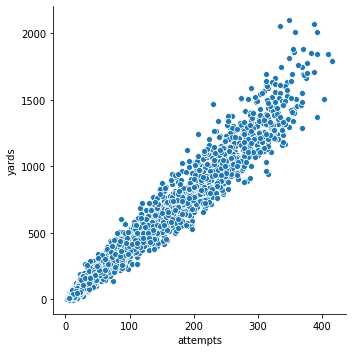

In [14]:
sns.relplot(
    data=running_backs,
    x="attempts", y="yards"
)

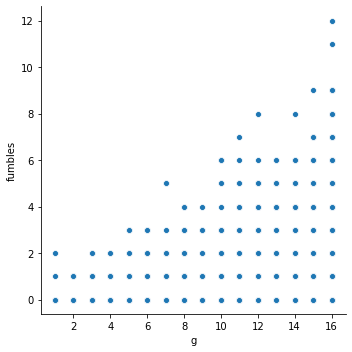

In [15]:
sns.relplot(
    data=running_backs,
    x="g", y="fumbles"
)

Yards per attempt averages out to around 4.5:

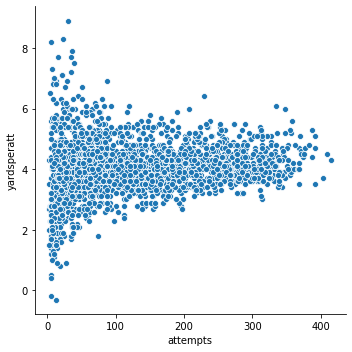

In [16]:
sns.relplot(
    data=running_backs,
    x="attempts", y="yardsperatt"
)

In [17]:
import numpy as np

combined_players = pd.DataFrame(columns=[
    "playerid", 
    "playername", 
    "g", 
    "gs", 
    "attempts", 
    "yards", 
    "tds", 
    "longgain", 
    "yardsperatt", 
    "yardspergame", 
    "fumbles"
])

for playerid, df in running_backs.groupby("playerid"):
    combined_players = combined_players.append(dict(zip(list(combined_players.columns),[
        playerid,
        list(df['playername'])[0],
        df['g'].sum(),
        df['gs'].sum(),
        df['attempts'].sum(),
        df['yards'].sum(),
        df['tds'].sum(),
        np.max(df['longgain']),
        (np.dot(df['attempts'], df['yardsperatt']) / np.sum(df['attempts'])),
        (np.dot(df['g'], df['yardspergame']) / np.sum(df['g'])),
        df['fumbles'].sum()
    ])), ignore_index=True)
    

    
combined_players.head()

,playerid,playername,g,gs,attempts,yards,tds,longgain,yardsperatt,yardspergame,fumbles
0,AAbduAm00,Ameer Abdullah,54,22,351,1372,6,36,3.897151,25.403704,8
1,AAbduKa00,Karim Abdul-Jabbar,60,52,1003,3413,33,45,3.415852,56.903333,9
2,AAdamJo03,Josh Adams,19,5,131,531,4,29,4.092366,27.947368,1
3,AAddaJo00,Joseph Addai,78,60,1095,4453,39,46,4.077626,57.103846,7
4,AAjayJa00,Jay Ajayi,45,23,572,2546,13,71,4.455070,56.595556,8


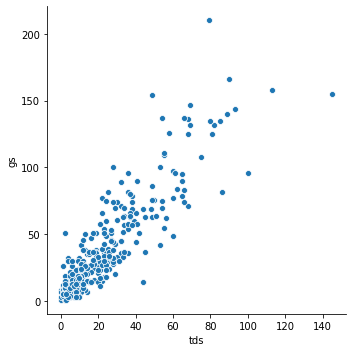

In [18]:
sns.relplot(
    data=combined_players,
    x="tds", y="gs"
)

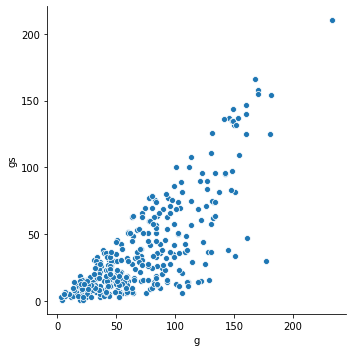

In [19]:
sns.relplot(
    data=combined_players,
    x="g", y="gs"
)

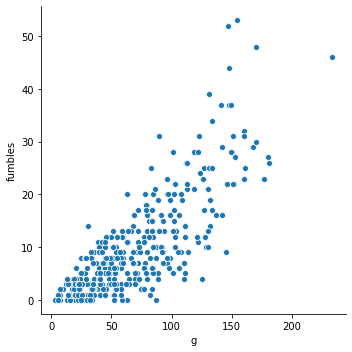

In [20]:
sns.relplot(
    data=combined_players,
    x="g", y="fumbles"
)

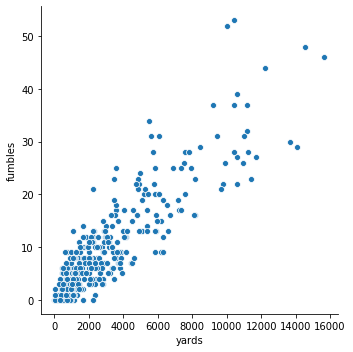

In [21]:
sns.relplot(
    data=combined_players,
    x="yards", y="fumbles"
)

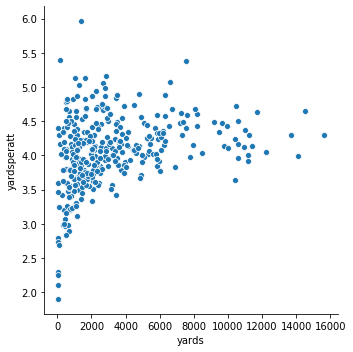

In [39]:
sns.relplot(
    data=combined_players,
    x="yards", y="yardsperatt
"
)